<a href="https://colab.research.google.com/github/AnIsAsPe/Estimacion-probabilidad-conflicto-en-trayectorias-de-vuelos-paralelos/blob/main/Notebooks/Estimaci%C3%B3n_de_pi_con_Montecarlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [1]:
import random
import numpy as np
import pandas as pd

from scipy.special import gamma # se utilizará para calcular el error en el problema 2
import time                     # para medir el tiempo que tarda la sumulación

import seaborn as sns
import matplotlib.pyplot as plt

# Problema 1. Aproximar el área de un circulo (𝜋)

Aproximar el valor del área de un círculo ($\pi r^2$), simulando el lanzamiento de puntos de forma aleatoria  en un cuadraro de de lado 2 (área = 4) que tiene inscrito un círculo de radio 1, de manera que el área = 𝜋.

## Lanzamientos aleatorios iid

¿de qué tipo?¿con qué distribución?

<h2> Gaussiana

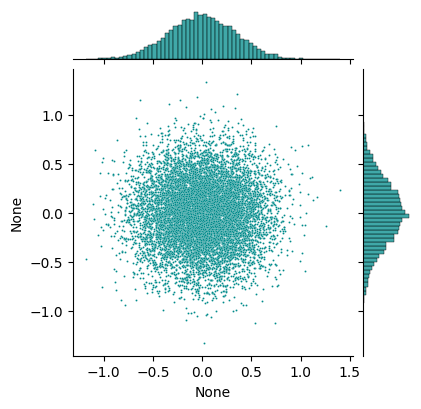

In [2]:
n = 10000
mu, sigma = 0., 1/3
xs = np.random.normal(mu, sigma, n)
ys = np.random.normal(mu, sigma, n)

sns.jointplot(x=xs, y=ys, kind='scatter', color='darkcyan', s=2, height=4 )
plt.show()


In [ ]:
M_covarianza = np.cov(xs, ys)
print(M_covarianza)

[[ 0.11068226 -0.00033316]
 [-0.00033316  0.11243071]]


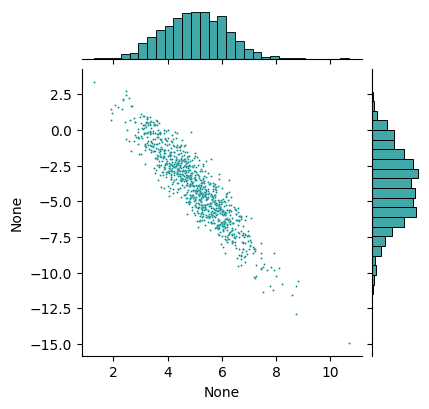

In [3]:
x2  = np.random.normal(loc=5, scale=1.2, size = 1000)
y2 = 6 - 2 * x2 + np.random.normal(size=1000)

sns.jointplot(x=x2, y=y2, kind='scatter', color='darkcyan', s=2, height=4 )
plt.show()

In [ ]:
M_covarianza2 = np.cov(x2, y2)
M_covarianza2

array([[ 1.46743481, -2.91984529],
       [-2.91984529,  6.84799909]])

<h2> Laplace

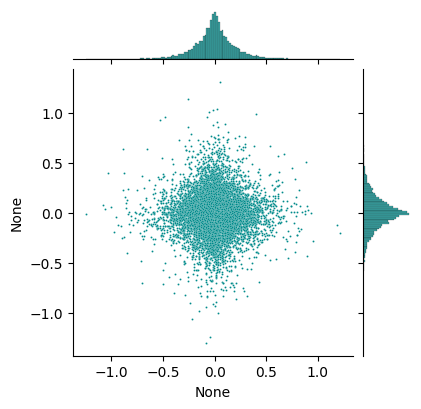

In [4]:
mu, scale = 0., 1/7
xs = np.random.laplace(mu, scale, n)
ys = np.random.laplace(mu, scale, n)

sns.jointplot(x=xs, y=ys, kind='scatter', color='darkcyan', s=2, height=4 )
plt.show()

<h2> Uniforme

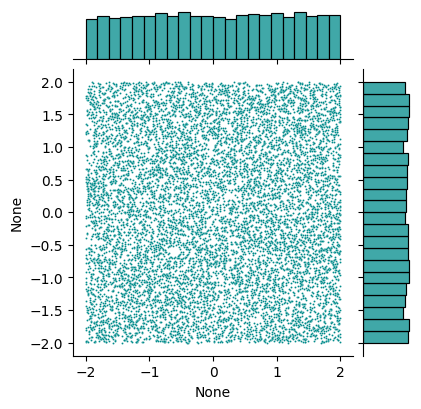

In [5]:
a, b = -2., 2.
xs= np.random.uniform(a, b, n)
ys= np.random.uniform(a, b, n)

sns.jointplot(x=xs, y=ys, kind='scatter', color='darkcyan', s=2, height=4)
plt.show()

## Solución

In [6]:
#Generación de las coordenadas aleatorias
n = 1000
a, b = -1., 1.
xs = np.random.uniform(low=a, high=b, size=n)
ys = np.random.uniform(low=a, high=b, size=n)

# Construimos un vector para cada punto que indique si éste cayó o no adentro
# del círculo.
en_circulo = np.where((np.sqrt(xs**2 + ys**2)<=1), 1, 0)

puntos_circulo = en_circulo.sum()
puntos_circulo

782

¿Cuántos puntos están en el cuadrado?
Si relacionamos los puntos que están dentro del círculo con el área del círculo y los que están dentro del cuadraro, con el area del cuadraro, podemos decir que :

$ \frac{puntos_{círculo}}{puntos_{cuadraro}}= \frac{\pi}{4}$

In [7]:
# Aproximación a pi
4 * puntos_circulo / n

3.128

In [28]:
def calcula_pi(n, print_results=True):
    '''Se lanzan puntos aleatorios con distribución uniforme en un cuadraro de
    de lado 2 (área = 4) que tiene inscrito un círculo de radio 2(área = pi)
    n: número de puntos que se lanzarán al tapete'''

    # Generación de las coordenadas aleatorias
    a, b = -1., 1.
    xs = np.random.uniform(low=a, high=b, size=n)
    ys = np.random.uniform(low=a, high=b, size=n)

    # Construimos un vector para cada punto que indique si éste cayó o no adentro
    # del círculo.
    en_circulo = np.where((np.sqrt(xs**2 + ys**2)<=1), 1, 0)

    puntos_circulo = en_circulo.sum()
    puntos_cuadrado = n

    pi = 4* puntos_circulo/ puntos_cuadrado
    error = pi-np.pi

    if print_results==True:
        plt.figure(figsize=(4,4))
        sns.scatterplot( x=xs, y=ys, s = 4, hue=en_circulo)
        plt.legend([],[], frameon=False)
        plt.show()

        print('pi =', pi)
        print('error =', error)

    return pi, error

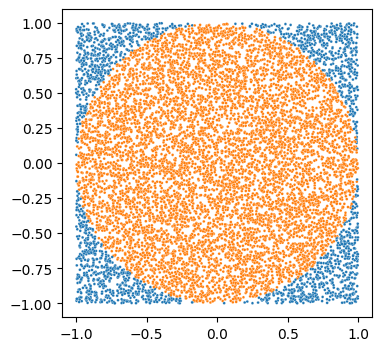

pi = 3.1288
error = -0.01279265358979309


In [29]:
pi, error = calcula_pi(10000)

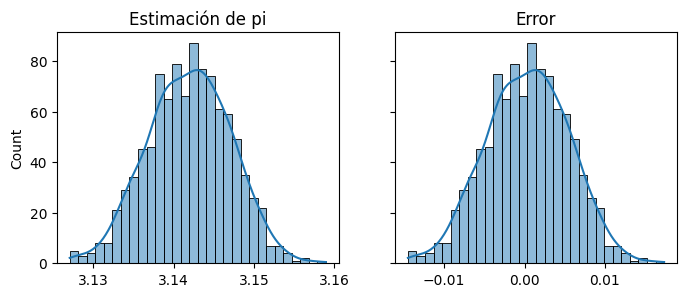

In [27]:
n = 100000
pi_est = []
errores = []
for x in range(1000):
    pi, error= calcula_pi(n, print_results=False)
    pi_est.append(pi)
    errores.append(error)

# Distribución del error en cada experimento
titulos = ('Estimación de pi', 'Error')
ig, ax = plt.subplots(1, 2, figsize=(8, 3), sharey='all')
for var, subplot, tit in zip((pi_est, errores), ax.flatten(), titulos):
    sns.histplot(x=var, ax=subplot, kde=True, bins=30)
    subplot.set_title(tit)
plt.show()

Se necesitan alrededor de 10 millones de lanzamientos para obtener cuatro cifras de precisión

# Problema 2. Estimación del volumen de una esfera en multiples dimensiones

Aproximar el valor del [volumen de una esfera en $d$ dimensiones](https://en.wikipedia.org/wiki/Volume_of_an_n-ball), con radio igual a 1, sumulando el lanzamiento de puntos de forma aleatoria en un cubo en  $d$ dimensiones.

Compararemos los resultados de la sumulación montecarlo con el Volumn que podemos calcular para una esfera de  $r$ = 1  en cualquier $d$ utilizando la siguiente fórmula :

$$ V_d = \frac{ \pi^\frac{d}{2} }{\Gamma(\frac{d}{2}+1)} $$

donde $\Gamma()$ es la [función gamma](https://en.wikipedia.org/wiki/Gamma_function)

Como vimos anterioremente, para dos dimensiones el área del círculo es igual a 𝜋

In [ ]:
d = 2
V_real  = np.pi**(d/2) / gamma( d/2 + 1)
V_real

3.141592653589793

La manera generalizada en que haremos los lanzamientos para $d$ dimensiones se expone en la siguiente celda de código.

In [ ]:
d = 2
n = 100

coordenadas = np.random.uniform(-1, 1, d*n).reshape(n,d)

pd.DataFrame(coordenadas, columns = ['dim'+str(i) for i in range(1, d+1)])


,dim1,dim2
0,0.216338,0.539762
1,-0.003608,-0.578043
2,-0.540562,0.191896
3,-0.229176,0.685365
4,-0.399567,0.223885
...,...,...
95,-0.577163,-0.020786
96,0.166354,-0.975661
97,0.472004,-0.742425
98,0.922805,-0.425199


d = 2	n = 10000000		n_esfera = 7853547		V_estimado = 3.14142		V_real = 3.14159	error = 0.00006		 = 0.8293864727020264
d = 3	n = 10000000		n_esfera = 5231101		V_estimado = 4.18488		V_real = 4.18879	error = 0.00093		 = 1.0934209823608398
d = 4	n = 10000000		n_esfera = 3081976		V_estimado = 4.93116		V_real = 4.93480	error = 0.00074		 = 0.8644118309020996
d = 5	n = 10000000		n_esfera = 1645372		V_estimado = 5.26519		V_real = 5.26379	error = 0.00027		 = 1.0228817462921143
d = 6	n = 10000000		n_esfera =  807773		V_estimado = 5.16975		V_real = 5.16771	error = 0.00039		 = 1.206101655960083
d = 7	n = 10000000		n_esfera =  368742		V_estimado = 4.71990		V_real = 4.72477	error = 0.00103		 = 1.3806111812591553
d = 8	n = 10000000		n_esfera =  158429		V_estimado = 4.05578		V_real = 4.05871	error = 0.00072		 = 1.4787967205047607
d = 9	n = 10000000		n_esfera =   64313		V_estimado = 3.29283		V_real = 3.29851	error = 0.00172		 = 1.663935661315918
d = 10	n = 10000000		n_esfera =   25192		V_estimado = 2.57

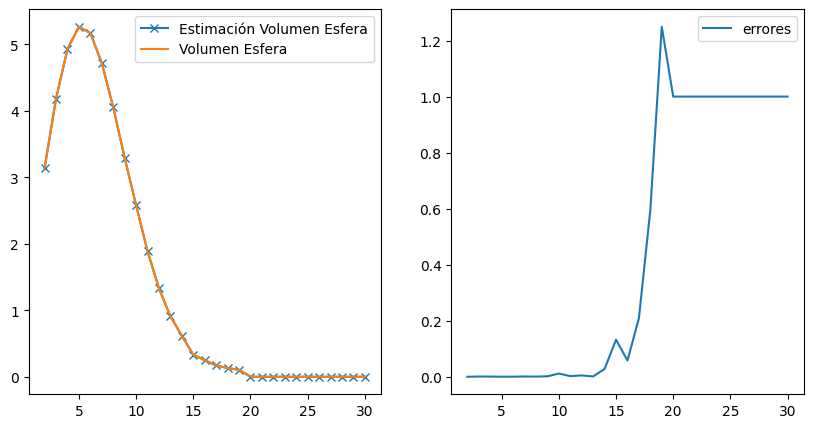

In [31]:
dmax = 30           # Numero máximo de dimensiones.
n = int(1e7)        # Número de lanzamientos (1e7  = 10 millones).
resultados = []

for d in np.arange(2, dmax+1):
    t0 = time.time()

    # Simulación de coordenadas en D dimensiones.
    coordenadas = np.random.uniform(-1, 1, d*n).reshape(n,d)

    # Puntos que caen dentro de la esfera.
    distancia = np.sum(coordenadas**2, axis=1)**0.5
    n_esfera = (distancia <= 1).sum()

    # Estimación del volumen de la esfera
    fraccion_puntos_en_esfera = n_esfera / n
    volumen_cubo  = 2**d
    estimacion_volumen_esfera = fraccion_puntos_en_esfera * volumen_cubo

    # Calculo del error
    volumen_esfera = np.pi**(d/2) / gamma(d/2 + 1)
    error = np.abs(estimacion_volumen_esfera - volumen_esfera)/volumen_esfera

    # Registro del tiempo y de los resultados
    t = time.time()-t0
    print(f"d = {d}\tn = {n}\t\tn_esfera = {n_esfera:{7}}\t\tV_estimado = {estimacion_volumen_esfera:.5f}\t\tV_real = {volumen_esfera:.5f}\terror = {error:.5f}\t\t = {t}")
    resultados.append([d, estimacion_volumen_esfera, volumen_esfera, error])

# Visualización de resultados

dims, estimacion_volumen_esfera, volumen_esfera, errores = np.array(resultados).T
fig, axs= plt.subplots(1, 2,figsize=(10,5))

# Gráficas de Volumen estimado vs real para cada D
axs[0].plot(dims, estimacion_volumen_esfera, label='Estimación Volumen Esfera',ls='-',marker='x')
axs[0].plot(dims, estimacion_volumen_esfera, label='Volumen Esfera',ls='-')

# Gráfica de errores para cada D
axs[1].plot(dims, errores, label='errores')
[ax.legend() for ax in axs]
plt.show()